In [32]:
import sys
sys.path.append('/home/fenglab/Desktop/transdiff_GRN/src/')

from find_modules import *
from topology import *
from rank_centrality import *
import seaborn as sns

random_s = 10
random.seed(random_s)

In [33]:
with open('./../../data/GSE208199/QuickGO-annotations-TFs-mus.tsv', 'r') as f:
    lines = f.readlines()
tfs = [line.split('\t')[2] for line in lines[1:]]

with open('./../../data/GSE208199/grn_expression_t3.txt', 'r') as f:
    lines = f.readlines()
genes = [line.split('\t')[0] for line in lines[1:]]

with open('./../../data/GSE208199/grn_expression_t5.txt', 'r') as f:
    lines = f.readlines()
genes2 = [line.split('\t')[0] for line in lines[1:]]

grntfs = list(set(tfs)&set(genes+genes2))

In [34]:
treatments = ['Ascl1p', 'Ascl1n', 'Ngn2p', 'Ngn2n']
colors = {'Ascl1p':'#24a394', 'Ascl1n':'#03574d', 'Ngn2p':'#b5971d', 'Ngn2n':'#705b06'}

def rank_for_plot(df, y='betweenness_centrality', rank=5):
    '''return the top ranked nodes and group number of nodes into interval of 50'''
    lst = []
    df['plotnodes'] = np.array(round(df['nodes']/50)*50, dtype=int)
    df = df[df['plotnodes']>0]
    df = df.sort_values(by=[y], ascending=False)
    for _, b in df.groupby(['nodes', 'run'], as_index=False):
        lst.append(b[:rank])
    drank = pd.concat(lst)
    return df, drank

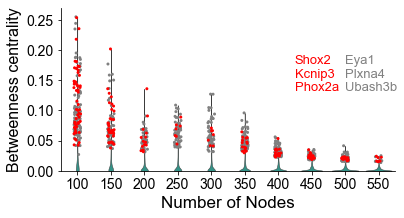

In [35]:
ax_y = 'betweenness_centrality'
# ax_y = 'local_betweenness_centrality'
# ax_y = 'outdegree_centrality'
# ax_y = 'local_outdegree_centrality'
df1 = pd.read_csv(f'./../../results/GSE208199/centrality_{treatments[0]}_t3.txt', sep='\t')
df1 = df1[(df1['nodes']>75)]
dfviolin, dfdot = rank_for_plot(df1, y=ax_y, rank=10)
                                
fig, ax = plt.subplots(figsize=(6, 3))
ax = sns.violinplot(x='plotnodes', y=ax_y, data = dfviolin, color=colors[treatments[0]], 
                    inner = None, linewidth=0.5, cut=0)
ax = sns.stripplot(x='plotnodes', y=ax_y, data = dfdot[~dfdot['geneid'].isin(grntfs)], color='grey', size=3)
tfr = dfdot[dfdot['geneid'].isin(grntfs)].groupby('geneid').count().sort_values(by='run', ascending=False)[:3].index
ax.text(0.7, 0.5, '\n'.join(tfr), wrap=True, fontsize=13, color='red', transform=ax.transAxes)

ax = sns.stripplot(x='plotnodes', y=ax_y, data = dfdot[dfdot['geneid'].isin(grntfs)], color='red', size=3)
ntfr = dfdot[~dfdot['geneid'].isin(grntfs)].groupby('geneid').count().sort_values(by='run', ascending=False)[:3].index
ax.text(0.85, 0.5, '\n'.join(ntfr), wrap=True, fontsize=13, color='grey', transform=ax.transAxes)


plt.xlabel('Number of Nodes', fontsize=17)
plt.ylabel('Betweenness centrality', fontsize=16)
plt.ylim(bottom=0, top=0.27)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
# plt.savefig('./../../figs/SS4A1.svg', pad_inches=0.1, bbox_inches='tight')

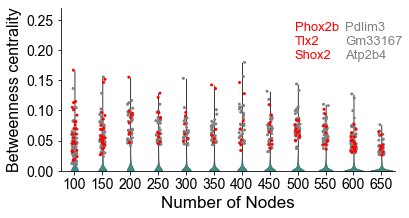

In [36]:
df1 = pd.read_csv(f'./../../results/GSE208199/centrality_{treatments[0]}_t5.txt', sep='\t')
df1 = df1[(df1['nodes']>75)]
dfviolin, dfdot = rank_for_plot(df1, y=ax_y, rank=10)
                                
fig, ax = plt.subplots(figsize=(6, 3))
ax = sns.violinplot(x='plotnodes', y=ax_y, data = dfviolin, color=colors[treatments[0]], 
                    inner = None, linewidth=0.5, cut=0)
ax = sns.stripplot(x='plotnodes', y=ax_y, data = dfdot[~dfdot['geneid'].isin(grntfs)], color='grey', size=3)
tfr = dfdot[dfdot['geneid'].isin(grntfs)].groupby('geneid').count().sort_values(by='run', ascending=False)[:3].index
ax.text(0.7, 0.7, '\n'.join(tfr), wrap=True, fontsize=13, color='red', transform=ax.transAxes)

ax = sns.stripplot(x='plotnodes', y=ax_y, data = dfdot[dfdot['geneid'].isin(grntfs)], color='red', size=3)
ntfr = dfdot[~dfdot['geneid'].isin(grntfs)].groupby('geneid').count().sort_values(by='run', ascending=False)[:3].index
ax.text(0.85, 0.7, '\n'.join(ntfr), wrap=True, fontsize=13, color='grey', transform=ax.transAxes)


plt.xlabel('Number of Nodes', fontsize=17)
plt.ylabel('Betweenness centrality', fontsize=16)
plt.ylim(bottom=0, top=0.27)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
# plt.savefig('./../../figs/SS4B1.svg', pad_inches=0.1, bbox_inches='tight')

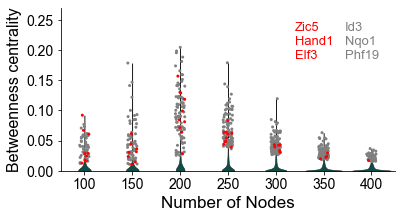

In [37]:
# ax_y = 'betweenness_centrality'
df2 = pd.read_csv(f'./../../results/GSE208199/centrality_{treatments[1]}_t3.txt', sep='\t')
df2 = df2[df2['nodes']>75]
dfviolin, dfdot = rank_for_plot(df2, y=ax_y, rank=10)
                                
fig, ax = plt.subplots(figsize=(6, 3))
ax = sns.violinplot(x='plotnodes', y=ax_y, data = dfviolin, color=colors[treatments[1]], 
                    inner = None, linewidth=0.5, cut=0)
ax = sns.stripplot(x='plotnodes', y=ax_y, data = dfdot[~dfdot['geneid'].isin(grntfs)], color='grey', size=3)
tfr = dfdot[dfdot['geneid'].isin(grntfs)].groupby('geneid').count().sort_values(by='run', ascending=False)[:3].index
ax.text(0.7, 0.7, '\n'.join(tfr), wrap=True, fontsize=13, color='red', transform=ax.transAxes)

ax = sns.stripplot(x='plotnodes', y=ax_y, data = dfdot[dfdot['geneid'].isin(grntfs)], color='red', size=3)
ntfr = dfdot[~dfdot['geneid'].isin(grntfs)].groupby('geneid').count().sort_values(by='run', ascending=False)[:3].index
ax.text(0.85, 0.7, '\n'.join(ntfr), wrap=True, fontsize=13, color='grey', transform=ax.transAxes)

plt.xlabel('Number of Nodes', fontsize=17)
plt.ylabel('Betweenness centrality', fontsize=16)
plt.ylim(bottom=0, top=0.27)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
# plt.savefig('./../../figs/SS4A2.svg', pad_inches=0.1, bbox_inches='tight')

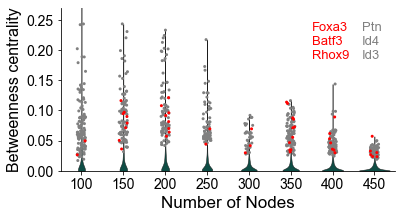

In [38]:
df2 = pd.read_csv(f'./../../results/GSE208199/centrality_{treatments[1]}_t5.txt', sep='\t')
df2 = df2[df2['nodes']>75]
dfviolin, dfdot = rank_for_plot(df2, y=ax_y, rank=10)
                                
fig, ax = plt.subplots(figsize=(6, 3))
ax = sns.violinplot(x='plotnodes', y=ax_y, data = dfviolin, color=colors[treatments[1]], 
                    inner = None, linewidth=0.5, cut=0)
ax = sns.stripplot(x='plotnodes', y=ax_y, data = dfdot[~dfdot['geneid'].isin(grntfs)], color='grey', size=3)
tfr = dfdot[dfdot['geneid'].isin(grntfs)].groupby('geneid').count().sort_values(by='run', ascending=False)[:3].index
ax.text(0.75, 0.7, '\n'.join(tfr), wrap=True, fontsize=13, color='red', transform=ax.transAxes)

ax = sns.stripplot(x='plotnodes', y=ax_y, data = dfdot[dfdot['geneid'].isin(grntfs)], color='red', size=3)
ntfr = dfdot[~dfdot['geneid'].isin(grntfs)].groupby('geneid').count().sort_values(by='run', ascending=False)[:3].index
ax.text(0.9, 0.7, '\n'.join(ntfr), wrap=True, fontsize=13, color='grey', transform=ax.transAxes)

plt.xlabel('Number of Nodes', fontsize=17)
plt.ylabel('Betweenness centrality', fontsize=16)
plt.ylim(bottom=0, top=0.27)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
# plt.savefig('./../../figs/SS4B2.svg', pad_inches=0.1, bbox_inches='tight')

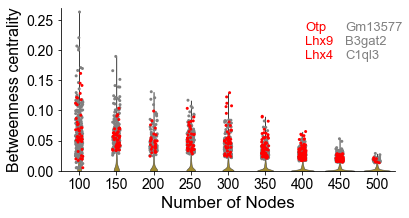

In [39]:
# ax_y = 'betweenness_centrality'
df3 = pd.read_csv(f'./../../results/GSE208199/centrality_{treatments[2]}_t3.txt', sep='\t')
df3 = df3[df3['nodes']>75]
dfviolin, dfdot = rank_for_plot(df3, y=ax_y, rank=20)
                                
fig, ax = plt.subplots(figsize=(6, 3))
ax = sns.violinplot(x='plotnodes', y=ax_y, data = dfviolin, color=colors[treatments[2]], 
                    inner = None, linewidth=0.5, cut=0)
ax = sns.stripplot(x='plotnodes', y=ax_y, data = dfdot[~dfdot['geneid'].isin(grntfs)], color='grey', size=3)
tfr = dfdot[dfdot['geneid'].isin(grntfs)].groupby('geneid').count().sort_values(by='run', ascending=False)[:3].index
ax.text(0.73, 0.7, '\n'.join(tfr), wrap=True, fontsize=13, color='red', transform=ax.transAxes)

ax = sns.stripplot(x='plotnodes', y=ax_y, data = dfdot[dfdot['geneid'].isin(grntfs)], color='red', size=3)
ntfr = dfdot[~dfdot['geneid'].isin(grntfs)].groupby('geneid').count().sort_values(by='run', ascending=False)[:3].index
ax.text(0.85, 0.7, '\n'.join(ntfr), wrap=True, fontsize=13, color='grey', transform=ax.transAxes)

plt.xlabel('Number of Nodes', fontsize=17)
plt.ylabel('Betweenness centrality', fontsize=16)
plt.ylim(bottom=0, top=0.27)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
# plt.savefig('./../../figs/SS4A3.svg', pad_inches=0.1, bbox_inches='tight')

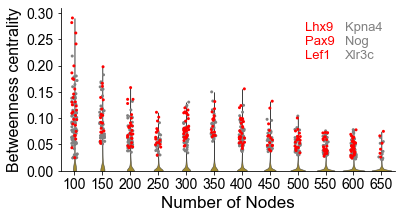

In [40]:
df3 = pd.read_csv(f'./../../results/GSE208199/centrality_{treatments[2]}_t5.txt', sep='\t')
df3 = df3[df3['nodes']>75]
dfviolin, dfdot = rank_for_plot(df3, y=ax_y, rank=10)
                                
fig, ax = plt.subplots(figsize=(6, 3))
ax = sns.violinplot(x='plotnodes', y=ax_y, data = dfviolin, color=colors[treatments[2]], 
                    inner = None, linewidth=0.5, cut=0)
ax = sns.stripplot(x='plotnodes', y=ax_y, data = dfdot[~dfdot['geneid'].isin(grntfs)], color='grey', size=3)
tfr = dfdot[dfdot['geneid'].isin(grntfs)].groupby('geneid').count().sort_values(by='run', ascending=False)[:3].index
ax.text(0.73, 0.7, '\n'.join(tfr), wrap=True, fontsize=13, color='red', transform=ax.transAxes)

ax = sns.stripplot(x='plotnodes', y=ax_y, data = dfdot[dfdot['geneid'].isin(grntfs)], color='red', size=3)
ntfr = dfdot[~dfdot['geneid'].isin(grntfs)].groupby('geneid').count().sort_values(by='run', ascending=False)[:3].index
ax.text(0.85, 0.7, '\n'.join(ntfr), wrap=True, fontsize=13, color='grey', transform=ax.transAxes)

plt.xlabel('Number of Nodes', fontsize=17)
plt.ylabel('Betweenness centrality', fontsize=16)
plt.ylim(bottom=0,top=0.31)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
# plt.savefig('./../../figs/SS4B3.svg', pad_inches=0.1, bbox_inches='tight')

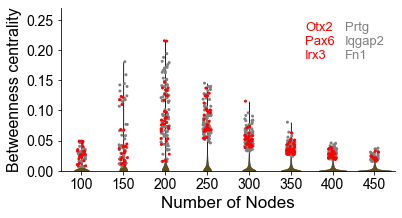

In [41]:
# ax_y = 'betweenness_centrality'
df4 = pd.read_csv(f'./../../results/GSE208199/centrality_{treatments[3]}_t3.txt', sep='\t')
df4 = df4[df4['nodes']>75]
dfviolin, dfdot = rank_for_plot(df4, y=ax_y, rank=10)
                                
fig, ax = plt.subplots(figsize=(6, 3))
ax = sns.violinplot(x='plotnodes', y=ax_y, data = dfviolin, color=colors[treatments[3]], 
                    inner = None, linewidth=0.5, cut=0)
ax = sns.stripplot(x='plotnodes', y=ax_y, data = dfdot[~dfdot['geneid'].isin(grntfs)], color='grey', size=3)
tfr = dfdot[dfdot['geneid'].isin(grntfs)].groupby('geneid').count().sort_values(by='run', ascending=False)[:3].index
ax.text(0.73, 0.7, '\n'.join(tfr), wrap=True, fontsize=13, color='red', transform=ax.transAxes)

ax = sns.stripplot(x='plotnodes', y=ax_y, data = dfdot[dfdot['geneid'].isin(grntfs)], color='red', size=3)
ntfr = dfdot[~dfdot['geneid'].isin(grntfs)].groupby('geneid').count().sort_values(by='run', ascending=False)[:3].index
ax.text(0.85, 0.7, '\n'.join(ntfr), wrap=True, fontsize=13, color='grey', transform=ax.transAxes)

plt.xlabel('Number of Nodes', fontsize=17)
plt.ylabel('Betweenness centrality', fontsize=16)
plt.ylim(bottom=0, top=0.27)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
# plt.savefig('./../../figs/SS4A4.svg', pad_inches=0.1, bbox_inches='tight')

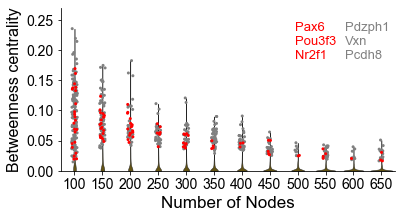

In [42]:
df4 = pd.read_csv(f'./../../results/GSE208199/centrality_{treatments[3]}_t5.txt', sep='\t')
df4 = df4[df4['nodes']>75]
dfviolin, dfdot = rank_for_plot(df4, y=ax_y, rank=10)
                                
fig, ax = plt.subplots(figsize=(6, 3))
ax = sns.violinplot(x='plotnodes', y=ax_y, data = dfviolin, color=colors[treatments[3]], 
                    inner = None, linewidth=0.5, cut=0)
ax = sns.stripplot(x='plotnodes', y=ax_y, data = dfdot[~dfdot['geneid'].isin(grntfs)], color='grey', size=3)
tfr = dfdot[dfdot['geneid'].isin(grntfs)].groupby('geneid').count().sort_values(by='run', ascending=False)[:3].index
ax.text(0.7, 0.7, '\n'.join(tfr), wrap=True, fontsize=13, color='red', transform=ax.transAxes)

ax = sns.stripplot(x='plotnodes', y=ax_y, data = dfdot[dfdot['geneid'].isin(grntfs)], color='red', size=3)
ntfr = dfdot[~dfdot['geneid'].isin(grntfs)].groupby('geneid').count().sort_values(by='run', ascending=False)[:3].index
ax.text(0.85, 0.7, '\n'.join(ntfr), wrap=True, fontsize=13, color='grey', transform=ax.transAxes)

plt.xlabel('Number of Nodes', fontsize=17)
plt.ylabel('Betweenness centrality', fontsize=16)
plt.ylim(bottom=0,top=0.27)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
# plt.savefig('./../../figs/SS4B4.svg', pad_inches=0.1, bbox_inches='tight')

In [55]:
# select transcription facctors from GRNs
# gene_ap = ['Shox2', 'Kcnip3', 'Phox2a', 'Tlx3', 'Six3', 'Isl1']
# gene_an = ['Zic5', 'Hand1', 'Elf3', 'Tcf15', 'Ascl2', 'Sox1']
# gene_np = ['Otp', 'Lhx9', 'Lhx4', 'Bhlhe23', 'Esrrg', 'Evx2']
# gene_nn = ['Otx2', 'Pax6', 'Irx3', 'Dbx1','Rfx4', 'Pou3f4']

gene_ap = ['Phox2b', 'Tlx2', 'Shox2', 'Foxa3', 'Pou3f1', 'Tbx18']
gene_an = ['Foxa3', 'Batf3', 'Rhox9', 'Gcm1', 'Hand1', 'Rhox6']
gene_np = ['Lhx9', 'Pax9','Lef1','Neurod1' ,'Foxp2', 'Neurod2']
gene_nn = ['Pax6','Pou3f3','Nr2f1','Hoxb2', 'Pou3f2','Ebf2']
runs = list(np.arange(1,6))
steps = np.linspace(0.3,0.7,20)

In [58]:
# compute centrality rank of selected nodes
treatment = treatments[3]
genelist = gene_nn
lstruns_select = []
lstruns_module = []
runs = list(np.arange(1,6))
for run in runs:
    lstrun_select = []
    lstrun_module = []
    DG = read_directed_grn(f'./../../results/GSE208199/GRN/{treatment}_{run}_t5.txt')
    for step in steps:
        DGp = remove_edge(DG, step, component='positive')
        if set(genelist)&set(list(DGp.nodes())):
            modules = louvain_cluster(DGp, random_state=True, random_s=random_s)
            df = compute_grn_centrality(DGp, modules, count=True)
            df['rank_betweenness'] = df['betweenness_centrality'].rank(method='max', ascending=False)
            df['rank_outdegree'] = df['outdegree_centrality'].rank(method='max', ascending=False)
            df['rank_local_betweenness'] = df.groupby('community')['local_betweenness_centrality'].rank(method='max', ascending=False)
            df['rank_local_outdegree'] = df.groupby('community')['local_outdegree_centrality'].rank(method='max', ascending=False)
            df = df.loc[df.index.get_level_values('geneid').isin(genelist)]
            dfmodule = pd.DataFrame.from_dict(modules, orient='index', columns=['community'])
            dfmodule = dfmodule[dfmodule['community'].isin(df['community'].unique())]
            dfmodule = pd.concat([dfmodule], keys=[len(modules)], names=['nodes', 'geneid'])
        lstrun_select.append(df)
        lstrun_module.append(dfmodule)
    lstruns_select.append(pd.concat(lstrun_select))
    lstruns_module.append(pd.concat(lstrun_module))
pd.concat(lstruns_select, keys=runs, names=['run']).to_csv(f'./../../results/GSE208199/rank_gene_{treatment}_t5.txt', sep='\t')
pd.concat(lstruns_module, keys=runs, names=['run']).to_csv(f'./../../results/GSE208199/rank_community_{treatment}_t5.txt', sep='\t')